# PART V Multi-step Forecasting

Overview

This part focuses on the real-world problem of multi-step forecasting for household electricity consumption and how to develop **naive methods**, **classical autoregression models**, **Convolutional** and **Long Short-Term Memory neural network** models for the problem. The tutorials in this part do not seek to demonstrate the best way to solve the problem, instead the dataset provides a context on which each of the specific methods can be demonstrated. As such, the performance of each method on the dataset are not compared directly. After reading the chapters in this part, you will know:
- How to load, summarize and visualize a multivariate time series dataset describing household electricity consumption over many years (Chapter 16).
- How to develop naive forecasting models for forecasting household electricity usage, the results of which can be used as a baseline to determine whether a more sophisticated model has skill (Chapter 17).
- How to diagnose the autocorrelation and develop autoregressive models for forecasting household electricity usage (Chapter 18).
- How to develop a suite of convolutional neural network models for forecasting household electricity usage (Chapter 19).
- How to develop a suite of Long Short-Term Memory neural network models for forecasting household electricity usage (Chapter 20).

# Chapter 16 How to Load and Explore Household Energy Usage Data

In this tutorial, you will discover a household power consumption dataset for multi-step time series forecasting and how to better understand the raw data using exploratory analysis. This dataset will provided the basis for the remaining tutorials in this part of the book. After completing this tutorial, you will know:
- The household power consumption dataset that describes electricity usage for a single house over four years.
- How to explore and understand the dataset using a suite of line plots for the series data and histogram for the data distributions.
- How to use the new understanding of the problem to consider different framings of the prediction problem, ways the data may be prepared, and modeling methods that may be used.


## 16.1 Tutorial Overview

This tutorial is divided into five parts; they are:
1. Power Consumption Dataset
2. Load Dataset
3. Patterns in Observations Over Time 
4. Time Series Data Distributions
5. Ideas on Modeling

## 16.2 Household Power Consumption Dataset

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute. It is a multivariate series comprised of seven variables
(besides the date and time); they are:
- global active power: The total active power consumed by the household (kilowatts).
- global reactive power: The total reactive power consumed by the household (kilowatts). 
- voltage: Average voltage (volts).
- global intensity: Average current intensity (amps).
- sub metering 1: Active energy for kitchen (watt-hours of active energy).
- sub metering 2: Active energy for laundry (watt-hours of active energy).
- sub metering 3: Active energy for climate control systems (watt-hours of active energy).

- 全局有功功率：家庭消耗的总有功功率（千瓦）。
- 全局无功功率：家庭消耗的总无功功率（千瓦）。
- 电压：平均电压（伏特）。
- 全局强度：平均电流强度（安培）。
- 分计量1：厨房的有功电能（有功电能的瓦时）。
- 分计量2：洗衣的有功电能（有功电能的瓦特小时）。
- 子计量 3：气候控制系统的有功电能（有功电能的瓦时）。

The remaining watt-hours can be calculated from the active energy by first converting the active energy to watt-hours then subtracting the other sub-metered active energy in watt-hours, as follows:

$remainder = (\frac{global\_act\_pwr × 1000}{60}) − (sub\_met\_1 + sub\_met\_2 + sub\_met\_3) $

## 16.3 Load Dataset

In [2]:
from pandas import read_csv
# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [7]:
# mark all missing values
import numpy as np
dataset.replace('?', np.nan, inplace=True)

Now we can create a new column that contains the remainder of the sub-metering, using the calculation from the previous section.

In [8]:
# add a column for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [10]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [12]:
# load the new file
dataset = read_csv('household_power_consumption.csv', header=None) 
print(dataset.head())

/Users/fengxuedong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                     0                    1                      2        3  \
0             datetime  Global_active_power  Global_reactive_power  Voltage   
1  2006-12-16 17:24:00                4.216                  0.418  234.840   
2  2006-12-16 17:25:00                5.360                  0.436  233.630   
3  2006-12-16 17:26:00                5.374                  0.498  233.290   
4  2006-12-16 17:27:00                5.388                  0.502  233.740   

                  4               5               6               7  \
0  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3   
1            18.400           0.000           1.000            17.0   
2            23.000           0.000           1.000            16.0   
3            23.000           0.000           2.000            17.0   
4            23.000           0.000           1.000            17.0   

                8  
0  sub_metering_4  
1        52.26667  
2       72.333336  
3       70.566666 

## 16.4 Patterns in Observations Over Time

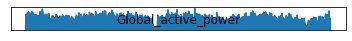

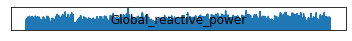

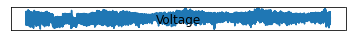

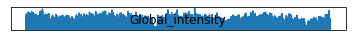

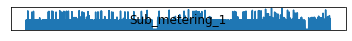

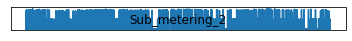

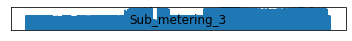

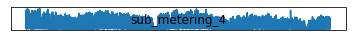

In [13]:
# line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # line plot for each variable

pyplot.figure()
for i in range(len(dataset.columns)):
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # plot data
    pyplot.plot(dataset[name])
    # set title
    pyplot.title(name, y=0)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()

Let’s zoom in and focus on the Global active power, or active power for short. We can create a new plot of the active power for each year to see if there are any common patterns across the years. The first year, 2006, has less than one month of data, so will remove it from the plot. The complete example is listed below.

<ipython-input-15-60a5f264ae0e>:17: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[str(year)]


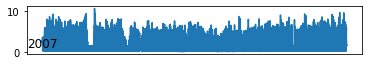

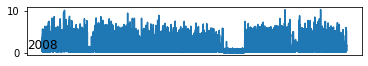

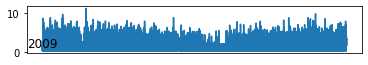

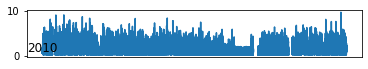

In [15]:
# yearly line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # plot active power for each year

years = ['2007', '2008', '2009', '2010'] 

pyplot.figure()
for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset[str(year)]
    # plot the active power for the year 
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(str(year), y=0, loc='left') # turn off ticks to remove clutter pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()

We can continue to zoom in on consumption and look at active power for each of the 12 months of 2007. This might help tease out gross structures across the months, such as daily and weekly patterns. The complete example is listed below.

<ipython-input-16-fb352ab98952>:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[month]


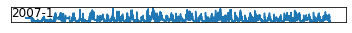

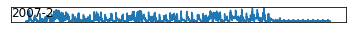

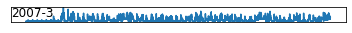

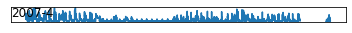

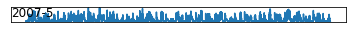

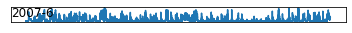

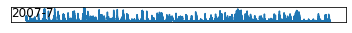

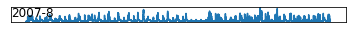

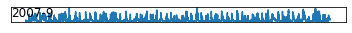

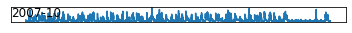

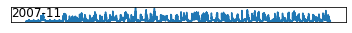

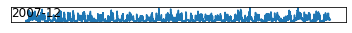

In [16]:
# monthly line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month 
    result = dataset[month]
    # plot the active power for the month 
    pyplot.plot(result['Global_active_power']) 
    # add a title to the subplot 
    pyplot.title(month, y=0, loc='left')
    # turn off ticks to remove clutter 
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()


Finally, we can zoom in one more level and take a closer look at power consumption at the daily level. We would expect there to be some pattern to consumption each day, and perhaps differences in days over a week. The complete example is listed below.

In [17]:
# daily line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
    # prepare subplot
    ax = pyplot.subplot(len(days), 1, i+1)
    # determine the day to plot
    day = '2007-01-' + str(days[i])
    # get all observations for the day
    result = dataset[day]
    # plot the active power for the day 
    pyplot.plot(result['Global_active_power']) 
    # add a title to the subplot 
    pyplot.title(day, y=0, loc='left', size=6)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()

<ipython-input-17-06622a57ee67>:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[day]


## 16.5 Time Series Data Distributions

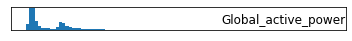

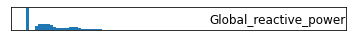

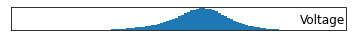

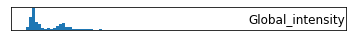

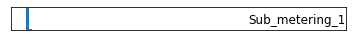

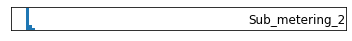

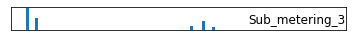

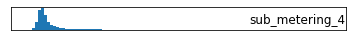

In [19]:
# histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # create histogram
    dataset[name].hist(bins=100)
    # set title
    pyplot.title(name, y=0, loc='right') 
    # turn off ticks to remove clutter 
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()

Running the example creates a single figure with a separate histogram for each of the 8 variables. We can see that active and reactive power, intensity, as well as the sub-metered power are all **skewed distributions** down towards small watt-hour or kilowatt values. We can also see that distribution of voltage data is strongly **Gaussian**.

<ipython-input-20-b0f9cb090896>:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[str(year)]


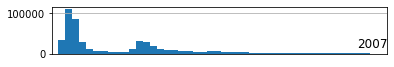

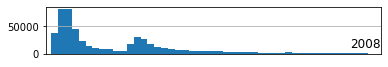

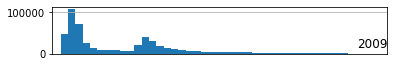

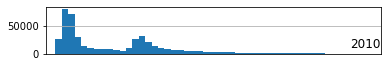

In [20]:
# yearly histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # plot active power for each year
years = ['2007', '2008', '2009', '2010'] 
pyplot.figure()
for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset[str(year)]
    # plot the active power for the year 
    result['Global_active_power'].hist(bins=100) 
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    pyplot.title(str(year), y=0, loc='right') 
    # turn off ticks to remove clutter pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()

<ipython-input-21-244ccb784e22>:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[month]


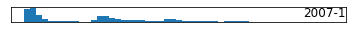

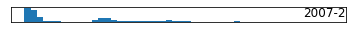

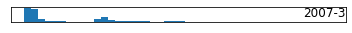

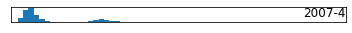

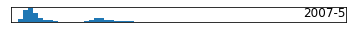

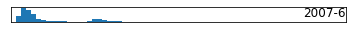

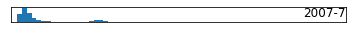

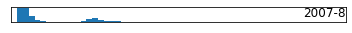

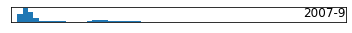

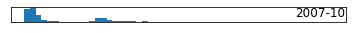

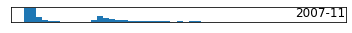

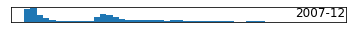

In [21]:
# monthly histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime']) # plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset[month]
    # plot the active power for the month 
    result['Global_active_power'].hist(bins=100) 
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot 
    pyplot.title(month, y=0, loc='right')
    # turn off ticks to remove clutter 
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()

## 16.6 Ideas on Modeling

Now that we know how to load and explore the dataset, we can pose some ideas on how to model the dataset. In this section, we will take a closer look at three main areas when working with the data; they are:
1. Problem Framing 
2. Data Preparation 
3. Modeling Methods

### 16.6.1 Problem Framing

There does not appear to be a seminal publication for the dataset to demonstrate the intended way to frame the data in a predictive modeling problem. We are therefore left to guess at possibly useful ways that this data may be used. The data is only for a single household, but perhaps effective modeling approaches could be generalized across to similar households. Perhaps the most useful framing of the dataset is to forecast an interval of future active power consumption.

该数据集似乎没有开创性的出版物来演示在预测建模问题中构建数据的预期方法。因此，我们只能猜测这些数据可能被使用的有效方式。这些数据仅适用于单个家庭，但也许有效的建模方法可以推广到类似的家庭。也许数据集最有用的框架是预测未来有效功耗的间隔。

our examples include:
- Forecast hourly consumption for the next day.
- Forecast daily consumption for the next week.
- Forecast daily consumption for the next month.
- Forecast monthly consumption for the next year.

Generally, these types of forecasting problems are referred to as multi-step forecasting. Models that make use of all of the variables might be referred to as a multivariate multi-step forecasting models. Each of these models is not limited to forecasting the minutely data, but instead could model the problem at or below the chosen forecast resolution. Forecasting consumption in turn, at scale, could aid in a utility company forecasting demand, which is a widely studied and important problem.

通常，这些类型的预测问题称为多步骤预测。利用所有变量的模型可能称为多变量多步骤预测模型。这些模型中的每一个都不限于预测分钟数据，而是可以在所选预测分辨率或以下对问题进行建模。反过来，大规模预测消费可以帮助公用事业公司预测需求，这是一个广泛研究的重要问题。

### 16.6.2 Data Preparation

There is a lot of flexibility in preparing this data for modeling. The specific data preparation methods and their benefit really depend on the chosen framing of the problem and the modeling methods. Nevertheless, below is a list of general data preparation methods that may be useful:
- Daily differencing may be useful to adjust for the daily cycle in the data.
- Annual differencing may be useful to adjust for any yearly cycle in the data.
- Normalization may aid in reducing the variables with differing units to the same scale. 

There are many simple human factors that may be helpful in engineering features from the
data, that in turn may make specific days easier to forecast. Some examples include:
- Indicating the time of day, to account for the likelihood of people being home or not.
- Indicating whether a day is a weekday or weekend.
- Indicating whether a day is a North American public holiday or not.

These factors may be significantly less important for forecasting monthly data, and perhaps to a degree for weekly data. More general features may include:
- Indicating the season, which may lead to the type or amount environmental control systems being used.


### 16.6.3 Modeling Methods

There are perhaps four classes of methods that might be interesting to explore on this problem; they are:
1. Naive Methods.
2. Classical Linear Methods. 
3. Machine Learning Methods. 
4. Deep Learning Methods.

1. Naive Methods

Naive methods would include methods that make very simple, but often very effective assump- tions. Some examples include:
- Tomorrow will be the same as today.
- Tomorrow will be the same as this day last year. 
- Tomorrow will be an average of the last few days.

2. Classical Linear Methods

Classical linear methods include techniques are very effective for univariate time series forecasting. Two important examples include:
- SARIMA.
- ETS (triple exponential smoothing).
They would require that the additional variables be discarded and the parameters of the model be configured or tuned to the specific framing of the dataset. Concerns related to adjusting the data for daily and seasonal structures can also be supported directly.

3. Machine Learning Methods

Machine learning methods require that the problem be framed as a supervised learning problem. This would require that lag observations for a series be framed as input features, discarding the temporal relationship in the data. A suite of nonlinear and ensemble methods could be explored, including:
- k-Nearest Neighbors.
- Support Vector Machines.
- Decision Trees.
- Random Forest.
- Gradient Boosting Machines.

Careful attention is required to ensure that the fitting and evaluation of these models preserved the temporal structure in the data. This is important so that the method is not able to cheat by harnessing observations from the future. These methods are often agnostic to large numbers of variables and may aid in teasing out whether the additional variables can be harnessed and add value to predictive models.
需要特别注意确保这些模型的拟合和评估保留数据中的时间结构。这一点很重要，这样该方法就无法通过利用来自未来的观察来作弊。这些方法通常与大量变量无关，可能有助于梳理是否可以利用其他变量并为预测模型增加价值。

4. Deep Learning Methods

Generally, neural networks have not proven very effective at autoregression type problems. Nevertheless, techniques such as **convolutional neural networks** are able to automatically learn complex features from raw data, including one-dimensional signal data. And **recurrent neural networks**, such as the **long short-term memory network**, are capable of directly learning across multiple parallel sequences of input data. Further, combinations of these methods, such as **CNN-LSTM** and **ConvLSTM**, have proven effective on time series classification tasks. It is possible that these methods may be able to harness the large volume of minute-based data and multiple input variables.

## 16.9 Summary
In this tutorial, you discovered a household power consumption dataset for multi-step time series forecasting and how to better understand the raw data using exploratory analysis. Specifically, you learned:
- The household power consumption dataset that describes electricity usage for a single house over four years.
- How to explore and understand the dataset using a suite of line plots for the series data and histogram for the data distributions.
- How to use the new understanding of the problem to consider different framings of the prediction problem, ways the data may be prepared, and modeling methods that may be used.